# Fourier / Spectral estimation

This notebook contains some examples of Fourier analysis / Spectral estimation



We can use the FFT from scipy<br>
from scipy.fftpack import fft as fft

As always, read the docs on any new package/function you come across...<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html



/var/folders/j3/yr77zp9x4hv5cydl2hf070rw0000gr/T/ipykernel_9243/3522672282.py:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


<Figure size 500x500 with 0 Axes>

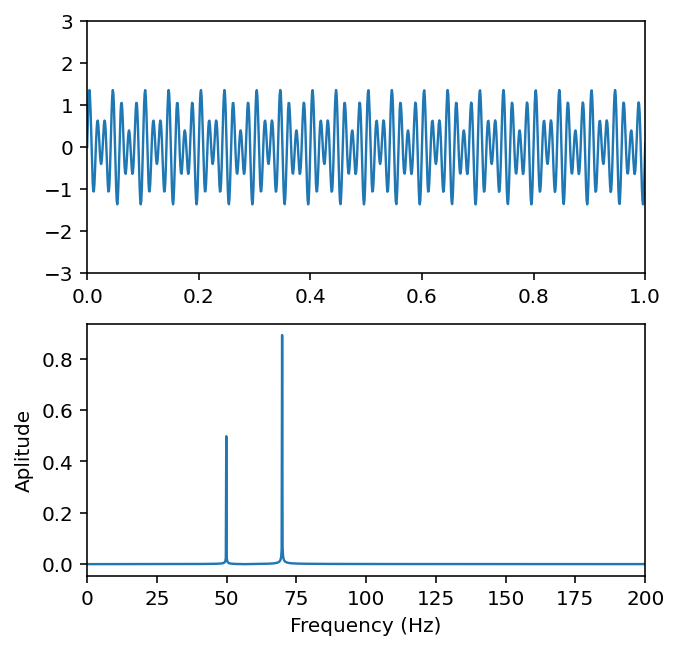

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft as fft
from matplotlib.ticker import *

##############
# set up a nice plotting area
plt.rcParams["figure.figsize"]=5,5

# Number of samplepoints (number of time bins in the time series)
N = 6000
N = int(N)
# sample spacing (size of the time step)
T = 1.0 / 1000.0

# set up an array of times
x = np.linspace(0.0, N*T, N)

# define a time series - in ths example it's a function described by:
# 1 sine wave
y = np.sin(50.0 * 2.0*np.pi*x)
# 2 sine waves
y = 0.5*np.sin(50.0 * 2.0*np.pi*x) + 0.9*np.sin(70.0 * 2.0*np.pi*x)

#compute the Fast Fourier Transform of y
yf = fft(y)


# make the Periodogram by taking the modulus squared - the abs() function
# and multiplying by a normalsing factor (2.0/N in this case)

per = 2.0/N * (np.abs(yf))

# Make sure we select the positive frequenices only, and lose teh zero frequency
per = per[1:int(N/2)]

# make an array of Fourier frequencies
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2)-1)

# the part 'int(N/2)-1' makes sure the x_f array is the same length as the 

# plot
# plot
plt.figure(1)
fig, ax = plt.subplots(dpi=144)
# line plot
plt.subplot(211)
plt.plot(x, y, linewidth=1.2) 
plt.xlim(0.,1)# zoom in
plt.ylim(-3, 3.)# zoom in
plt.xlabel(r' ', fontsize=10)

plt.subplot(212)
plt.plot(xf, per, linewidth=1.2)                 
plt.xlim(0.,200)# zoom in
plt.xlabel(r'Frequency (Hz)', fontsize=10)
plt.ylabel(r'Aplitude', fontsize=10)
plt.show()            
                 

# The power spectra of an amplitude non-stationary signal

<Figure size 360x360 with 0 Axes>

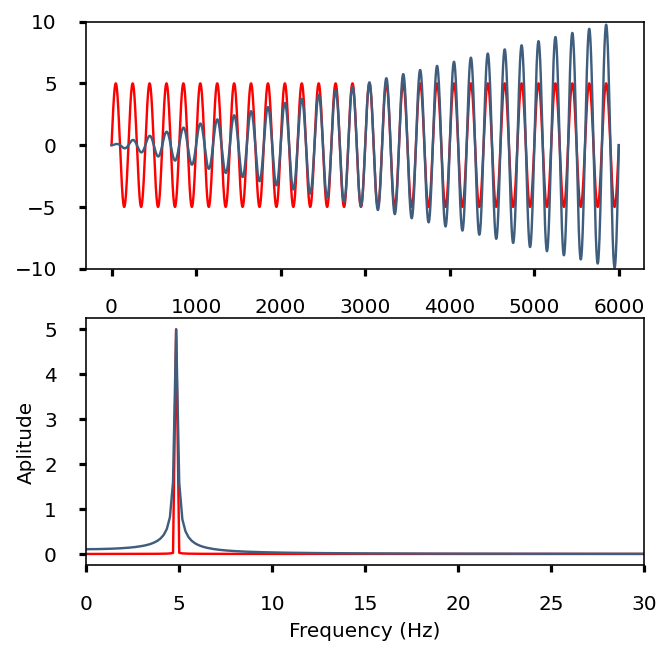

In [151]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft as fft
from matplotlib.ticker import *

##############
# set up a nice plotting area
plt.rcParams["figure.figsize"]=5,5

# Number of samplepoints (number of time bins in the time series)
N = 6000
N = int(N)
# sample spacing (size of the time step)
T = 1.0 / 1000.0

# set up an array of times
x = np.linspace(0.0, N*T, N)


# define a time series - in ths example it's a function described by:

signal = np.sin(5.0 * 2.0*np.pi*x)


# create an amplitude modulation for one
# This is a linear increase cross the signal

amplmod = np.linspace(0.0, 10, N)
amplmean = np.mean(ampl1)

y1 = amplmean * signal

y2 = amplmod * signal

#compute the Fast Fourier Transform of y
yf1 = fft(y1)
yf2 = fft(y2)

# make the Periodogram by taking the modulus squared - the abs() function
# and multiplying by a normalsing factor (2.0/N in this case)

per1 = 2.0/N * (np.abs(yf1))
per2 = 2.0/N * (np.abs(yf2))

# Make sure we select the positive frequenices only, and lose teh zero frequency
per1 = per1[1:int(N/2)]
per2 = per2[1:int(N/2)]

# make an array of Fourier frequencies
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2)-1)

# the part 'int(N/2)-1' makes sure the x_f array is the same length as the 

# plot
plt.figure(1)
fig, ax = plt.subplots(dpi=144)
# line plot
plt.subplot(211)
plt.plot(y1, color='r', linewidth=1.2) 
plt.plot(y2, color=col1, linewidth=1.2) 
#plt.xlim(0.,3000)# zoom in
plt.ylim(-10.0, 10.)# zoom in
plt.xlabel(r' ', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.subplot(212)
plt.plot(xf, per1, color='r', linewidth=1.2)                 
plt.plot(xf, per2, color=col1, linewidth=1.2)  
plt.xlim(0.,30)# zoom in
plt.xlabel(r'Frequency (Hz)', fontsize=10)
plt.ylabel(r'Aplitude', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

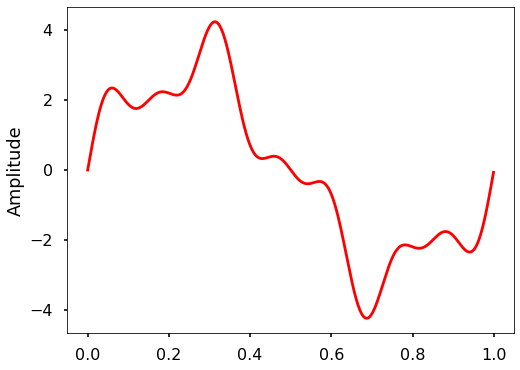

In [188]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

# sampling rate
sr = 1000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [114]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X


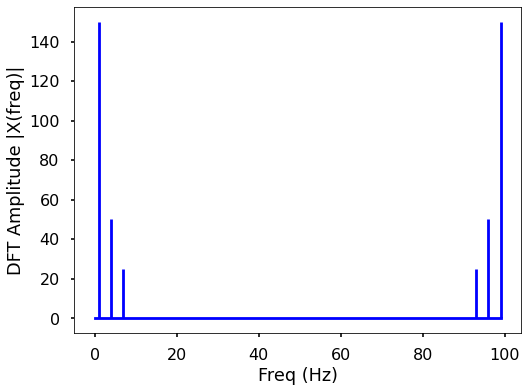

In [115]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

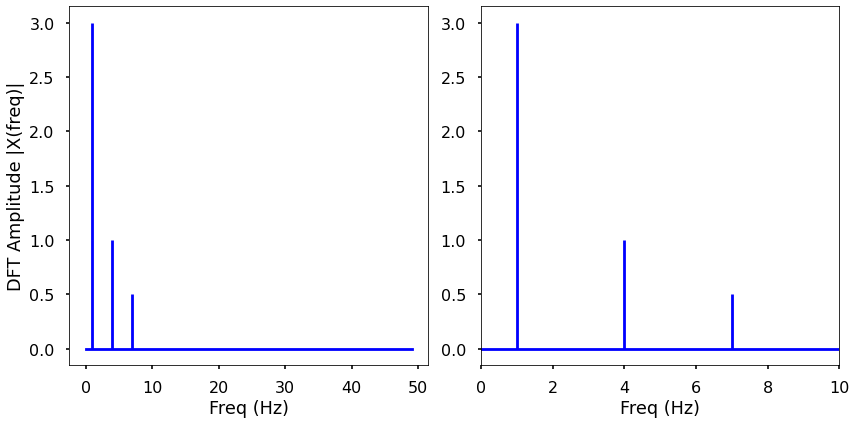

In [116]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [117]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [118]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))

110 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [125]:
# sampling rate 20000
sr = 20000
%timeit DFT(gen_sig(sr))

13.9 s ± 583 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [139]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X

In [141]:
X=FFT(x)

# calculate the frequency
N = len(X)
N = int(N)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [ ]:
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

# The FFT and IFFT in python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

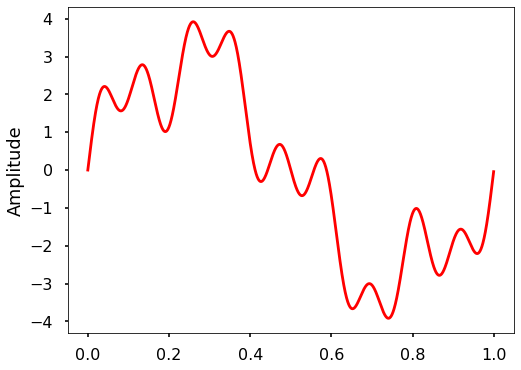

In [177]:
# sampling rate
sr = 2048
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 9   
x += 0.8* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

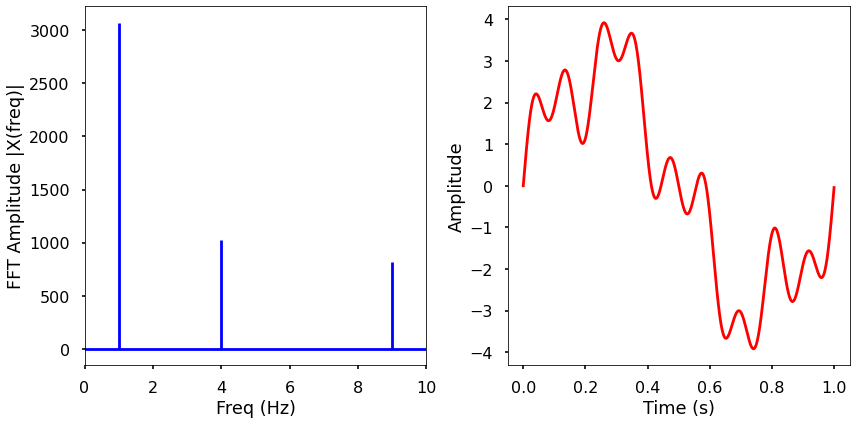

In [178]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# same thing but from scipy

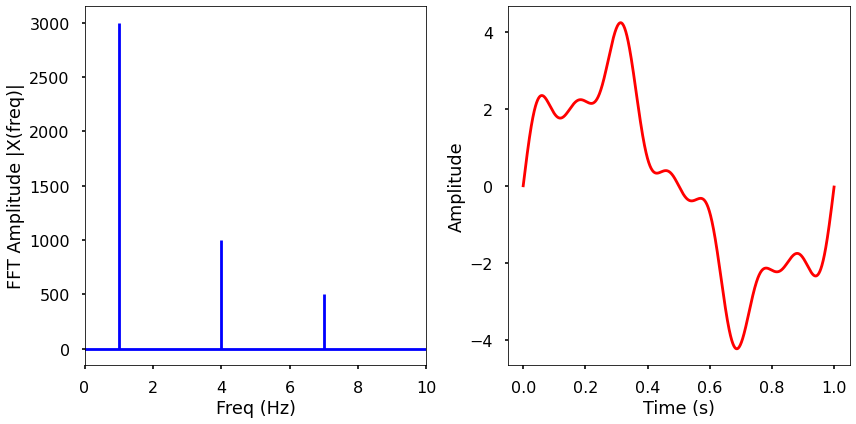

In [136]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Signal generation code

This allows for both amplitude and phase modification

In [138]:
#Import the required package
import numpy as np

# Building a class Signal for better use.
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.
  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.
    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians
    
    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
  def sine(self):
    """
    Method of Signal
    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal
    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

# Filtering a signal

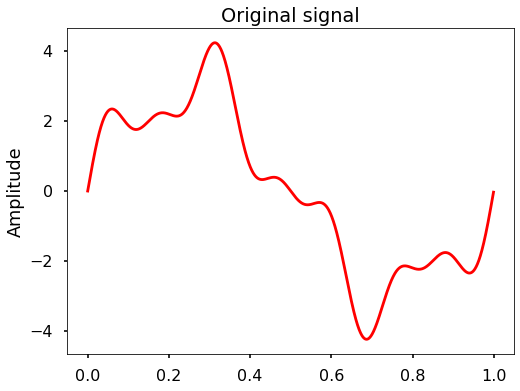

In [154]:
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt


# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)


plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.show()

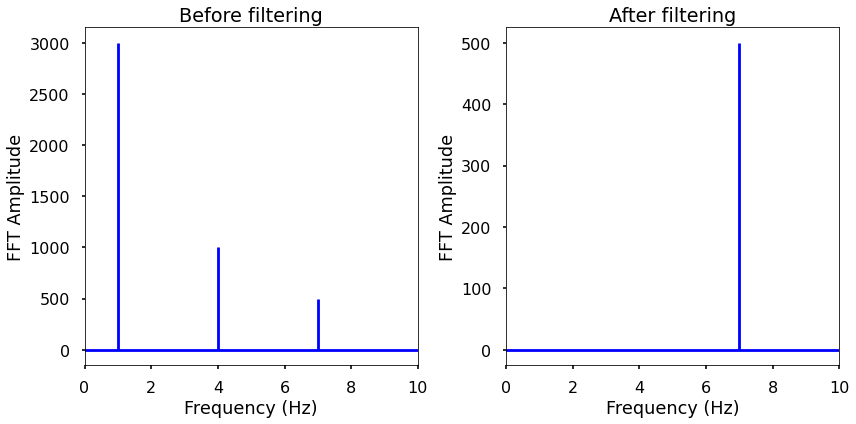

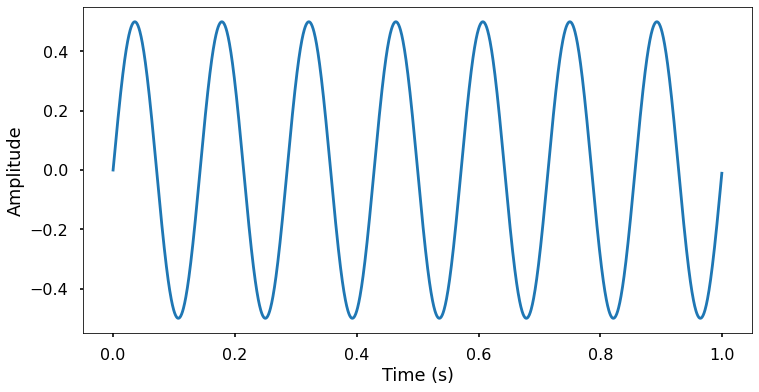

In [158]:
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)


# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()



# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


# A signal with noise

In this example I simultea a signal using 2 sine waves. I then add random white noise to to the signal. We want to Fourier transform this into teh frequency domain so that we can perform filtering and suppress the noise. Then we can Inverse transfrom this back to recover the original signal without the noise.

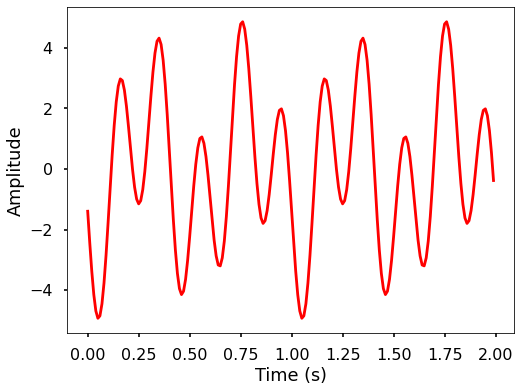

In [179]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,2,ts)

freq = 5.
x = 3*np.sin(2*np.pi*freq*t + 3)

freq = 2
x += 2*np.sin(2*np.pi*freq*t - 2)


plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()

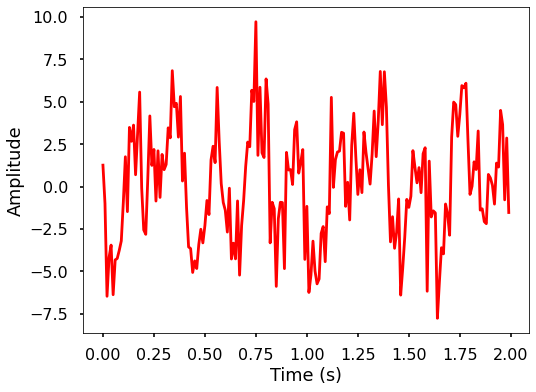

In [161]:
np.random.seed(10)
x_noise = x + \
  np.random.normal(0, 2, size = len(x))

plt.figure(figsize = (8, 6))
plt.plot(t, x_noise, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()

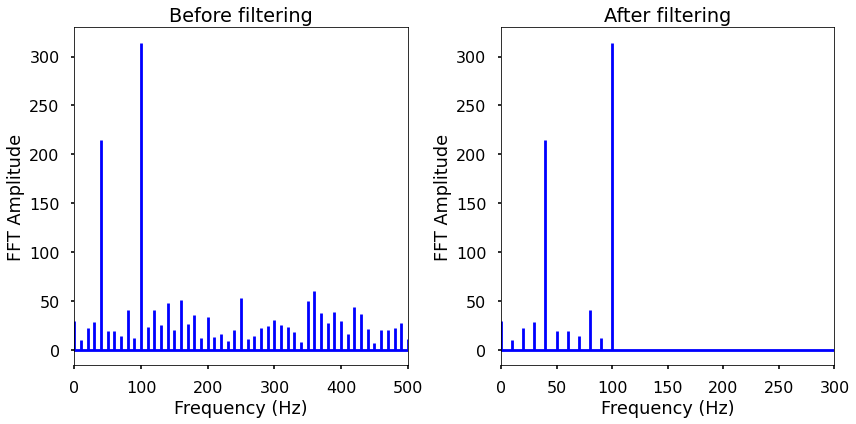

In [185]:
# FFT the signal
sig_fft = fft(x_noise)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x_noise), d=1./2000)

# define the cut-off frequency
cut_off = 105

# loww-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) > cut_off] = 0


# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)


# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 500)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 300)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()




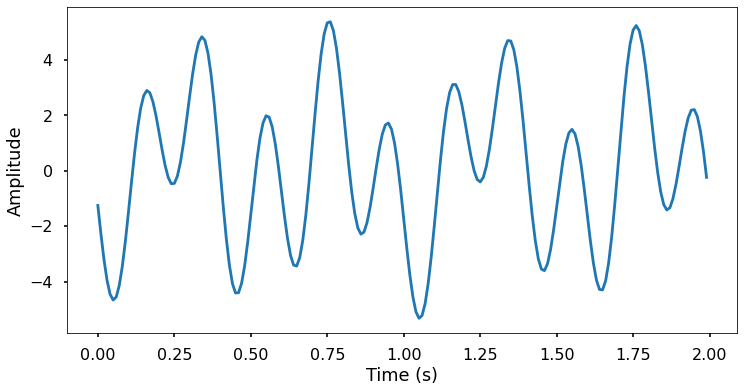

In [186]:
# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()